### Connect to Database

In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import mysql.connector as sqlcon

In [631]:
import warnings
warnings.filterwarnings('ignore')

In [632]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Datascience@2022',
    database = 'northwind'
)

In [633]:
curs = mydb.cursor()

def sql_table(query):
    curs.execute(query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

### Data Detail & Transaction 

### Tabel yang ditampilkan adalah Orders, order detail dan shippers

* Di tabel order details terdapat space, untuk mengakses tersebut gunakan petik terbalik

In [634]:
tabel1 = sql_table(
    '''select o.OrderID, CustomerID, EmployeeID, ProductID, OrderDate, RequiredDate, ShippedDate, CompanyName, Freight, ShipName, ShipAddress, ShipCity, ShipRegion, ShipPostalCode, ShipCountry, UnitPrice, Quantity, Discount 
    from orders o join `order details` od join shippers s on o.OrderID = od.OrderID AND o.ShipVia = s.ShipperID;'''
)

tabel1.head()

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount
0,10985,HUNGO,2,32,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Co. Cork,None,Ireland,32.0000,35,0.1
1,10985,HUNGO,2,18,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Co. Cork,None,Ireland,62.5000,8,0.1
2,10985,HUNGO,2,16,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Co. Cork,None,Ireland,17.4500,36,0.1
3,10982,BOTTM,2,43,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,46.0000,9,0.0
4,10982,BOTTM,2,7,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,BC,T2F 8M4,Canada,30.0000,20,0.0


### Keterangan column tabel 

* OrderID: Kode pemesanan
* CustomerID: Kode pelanggan
* EmployeeID: kode karyawan
* ProductID: Kode product
* OrderDate: Tanggal pemesanan
* RequiredDate: tanggal dimana pemesanan tersedia
* ShippedDate: Tanggal pengiriman
* CompanyName: Nama perusahaan pengapalan
* Freight: kargo dalam satuan mata uang USD
* ShipName: Nama pengapalan
* ShipAddress: alamat pengapalan
* ShipCity: kota pengapalan
* ShipRegion: wilayah pengapalan
* ShipPostalCode: pos kode pengapalan
* ShipCountry: negara pengapalan
* UnitPrice: Harga Unit dalam satuan mata uang USD
* Quantity: jumlah unit 
* Discount: diskon unit

In [635]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2155 non-null   int64         
 1   CustomerID      2155 non-null   object        
 2   EmployeeID      2155 non-null   int64         
 3   ProductID       2155 non-null   int64         
 4   OrderDate       2155 non-null   datetime64[ns]
 5   RequiredDate    2155 non-null   datetime64[ns]
 6   ShippedDate     2082 non-null   datetime64[ns]
 7   CompanyName     2155 non-null   object        
 8   Freight         2155 non-null   object        
 9   ShipName        2155 non-null   object        
 10  ShipAddress     2155 non-null   object        
 11  ShipCity        2155 non-null   object        
 12  ShipRegion      856 non-null    object        
 13  ShipPostalCode  2100 non-null   object        
 14  ShipCountry     2155 non-null   object        
 15  Unit

### Query Aggregrating

In [636]:
### Query 2 (Aggregrating)

tabel2 = sql_table(
''' SELECT CompanyName, count(distinct ShipName) as ship_total_service from orders o join shippers s on o.ShipVia = s.ShipperID group by CompanyName order by count(distinct ShipName) desc; '''
)
tabel2

,CompanyName,ship_total_service
0,United Package,83
1,Speedy Express,79
2,Federal Shipping,78


* Query ini menampilkan jumlah pelayanan kapal dari ketiga perusahaan ekspor import yang dimana united package dimana dapat melayani kapal terbanyak

### Common Table Execution 

In [637]:
### Query 3 (CTE)

tabel3 = sql_table(
    '''with ship_data as (
	select ShipCountry, ShipName, Quantity from orders o join `order details` od on o.OrderID = od.OrderID where ShipCountry = 'USA'
)SELECT ShipName, sum(Quantity) as total_quantity from ship_data group by ShipName order by sum(Quantity) desc;
'''
)
tabel3

,ShipName,total_quantity
0,Save-a-lot Markets,4958
1,Rattlesnake Canyon Grocery,1383
2,White Clover Markets,1063
3,Old World Delicatessen,603
4,Great Lakes Food Market,345
5,Split Rail Beer & Ale,327
6,Let's Stop N Shop,181
7,Lonesome Pine Restaurant,134
8,Hungry Coyote Import Store,122
9,Trail's Head Gourmet Provisioners,89


* Pada CTE ini menampilkan nama kapal beserta jumlah barang yang diangkut yang dimana berasal dari USA. Tujuan mengetahui berapa banyak barang yang diangkut kekapal

### Check Missing Value

In [638]:
round((tabel1.isna().sum() / len(tabel1) * 100), 1)

OrderID            0.0
CustomerID         0.0
EmployeeID         0.0
ProductID          0.0
OrderDate          0.0
RequiredDate       0.0
ShippedDate        3.4
CompanyName        0.0
Freight            0.0
ShipName           0.0
ShipAddress        0.0
ShipCity           0.0
ShipRegion        60.3
ShipPostalCode     2.6
ShipCountry        0.0
UnitPrice          0.0
Quantity           0.0
Discount           0.0
dtype: float64

### Untuk proses missing value dilakukan drop column pada ShipRegion dikarenakan missing valuenya pada column tersebut mencapai 60.3% maka hasilnya sebagai berikut

In [639]:
tabel1 = tabel1.drop('ShipRegion', axis=1)
tabel1

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount
0,10985,HUNGO,2,32,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,None,Ireland,32.0000,35,0.10
1,10985,HUNGO,2,18,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,None,Ireland,62.5000,8,0.10
2,10985,HUNGO,2,16,1996-04-29,1996-05-27,1996-05-02,Speedy Express,91.5100,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,None,Ireland,17.4500,36,0.10
3,10982,BOTTM,2,43,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,46.0000,9,0.00
4,10982,BOTTM,2,7,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,30.0000,20,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10992,THEBI,1,72,1996-05-01,1996-05-29,1996-05-03,Federal Shipping,4.2700,The Big Cheese,89 Jefferson Way\r\nSuite 2,Portland,97201,USA,34.8000,2,0.00
2151,10990,ERNSH,2,61,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,28.5000,66,0.15
2152,10990,ERNSH,2,55,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,24.0000,65,0.15
2153,10990,ERNSH,2,34,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,14.0000,60,0.15


In [640]:
tabel1.isna().sum()

OrderID            0
CustomerID         0
EmployeeID         0
ProductID          0
OrderDate          0
RequiredDate       0
ShippedDate       73
CompanyName        0
Freight            0
ShipName           0
ShipAddress        0
ShipCity           0
ShipPostalCode    55
ShipCountry        0
UnitPrice          0
Quantity           0
Discount           0
dtype: int64

In [641]:
tabel1 = tabel1.dropna()
tabel1

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount
3,10982,BOTTM,2,43,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,46.0000,9,0.00
4,10982,BOTTM,2,7,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,23 Tsawassen Blvd.,Tsawassen,T2F 8M4,Canada,30.0000,20,0.00
5,10980,FOLKO,4,75,1996-04-26,1996-06-07,1996-05-17,Speedy Express,1.2600,Folk och f├ñ HB,├àkergatan 24,Br├ñcke,S-844 67,Sweden,7.7500,40,0.20
6,10976,HILAA,1,28,1996-04-24,1996-06-05,1996-05-03,Speedy Express,37.9700,HILARI├ôN-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Crist├│bal,5022,Venezuela,45.6000,20,0.00
7,10970,BOLID,9,52,1996-04-23,1996-05-07,1996-05-24,Speedy Express,16.1600,B├│lido Comidas preparadas,"C/ Araquil, 67",Madrid,28023,Spain,7.0000,40,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,10992,THEBI,1,72,1996-05-01,1996-05-29,1996-05-03,Federal Shipping,4.2700,The Big Cheese,89 Jefferson Way\r\nSuite 2,Portland,97201,USA,34.8000,2,0.00
2151,10990,ERNSH,2,61,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,28.5000,66,0.15
2152,10990,ERNSH,2,55,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,24.0000,65,0.15
2153,10990,ERNSH,2,34,1996-05-01,1996-06-12,1996-05-07,Federal Shipping,117.6100,Ernst Handel,Kirchgasse 6,Graz,8010,Austria,14.0000,60,0.15


In [642]:
tabel1.isna().sum()

OrderID           0
CustomerID        0
EmployeeID        0
ProductID         0
OrderDate         0
RequiredDate      0
ShippedDate       0
CompanyName       0
Freight           0
ShipName          0
ShipAddress       0
ShipCity          0
ShipPostalCode    0
ShipCountry       0
UnitPrice         0
Quantity          0
Discount          0
dtype: int64

In [643]:
tabel1.sample(20)

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,ShipAddress,ShipCity,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount
1454,10781,WARTH,2,74,1996-01-17,1996-02-14,1996-01-19,Federal Shipping,73.1600,Wartian Herkku,Torikatu 38,Oulu,90110,Finland,10.0000,35,0.00
1097,10459,VICTE,4,72,1995-03-30,1995-04-27,1995-03-31,United Package,25.0900,Victuailles en stock,"2, rue du Commerce",Lyon,69004,France,27.8000,40,0.00
769,10801,BOLID,4,29,1996-01-29,1996-02-26,1996-01-31,United Package,97.0900,B├│lido Comidas preparadas,"C/ Araquil, 67",Madrid,28023,Spain,123.7900,20,0.25
102,10845,QUICK,8,35,1996-02-21,1996-03-06,1996-03-01,Speedy Express,212.9800,QUICK-Stop,Taucherstra├ƒe 10,Cunewalde,01307,Germany,18.0000,25,0.10
57,10890,DUMON,7,41,1996-03-18,1996-04-15,1996-03-20,Speedy Express,32.7600,Du monde entier,"67, rue des Cinquante Otages",Nantes,44000,France,9.6500,14,0.00
1010,10530,PICCO,3,17,1995-06-08,1995-07-06,1995-06-12,United Package,339.2200,Piccolo und mehr,Geislweg 14,Salzburg,5020,Austria,39.0000,40,0.00
771,10797,DRACD,7,11,1996-01-25,1996-02-22,1996-02-05,United Package,33.3500,Drachenblut Delikatessen,Walserweg 21,Aachen,52066,Germany,21.0000,20,0.00
59,10890,DUMON,7,17,1996-03-18,1996-04-15,1996-03-20,Speedy Express,32.7600,Du monde entier,"67, rue des Cinquante Otages",Nantes,44000,France,39.0000,15,0.00
380,10522,LEHMS,4,8,1995-05-31,1995-06-28,1995-06-06,Speedy Express,45.3300,Lehmanns Marktstand,Magazinweg 7,Frankfurt a.M.,60528,Germany,40.0000,24,0.00
607,10962,QUICK,8,53,1996-04-18,1996-05-16,1996-04-22,United Package,275.7900,QUICK-Stop,Taucherstra├ƒe 10,Cunewalde,01307,Germany,32.8000,20,0.00


### Extract Data

In [644]:
dt_order = tabel1['OrderDate'].dt

In [645]:
dt_order.month_name()

3       April
4       April
5       April
6       April
7       April
        ...  
2150      May
2151      May
2152      May
2153      May
2154      May
Name: OrderDate, Length: 2027, dtype: object

In [646]:
dt_order.year

3       1996
4       1996
5       1996
6       1996
7       1996
        ... 
2150    1996
2151    1996
2152    1996
2153    1996
2154    1996
Name: OrderDate, Length: 2027, dtype: int64

In [647]:
tabel1['YearOrder'] = dt_order.year
tabel1['MonthOrder'] = dt_order.month_name()

In [648]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 3 to 2154
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2027 non-null   int64         
 1   CustomerID      2027 non-null   object        
 2   EmployeeID      2027 non-null   int64         
 3   ProductID       2027 non-null   int64         
 4   OrderDate       2027 non-null   datetime64[ns]
 5   RequiredDate    2027 non-null   datetime64[ns]
 6   ShippedDate     2027 non-null   datetime64[ns]
 7   CompanyName     2027 non-null   object        
 8   Freight         2027 non-null   object        
 9   ShipName        2027 non-null   object        
 10  ShipAddress     2027 non-null   object        
 11  ShipCity        2027 non-null   object        
 12  ShipPostalCode  2027 non-null   object        
 13  ShipCountry     2027 non-null   object        
 14  UnitPrice       2027 non-null   object        
 15  Quan

In [649]:
dt_shipper = tabel1['ShippedDate'].dt

In [650]:
dt_shipper.month_name()

3       May
4       May
5       May
6       May
7       May
       ... 
2150    May
2151    May
2152    May
2153    May
2154    May
Name: ShippedDate, Length: 2027, dtype: object

In [651]:
dt_shipper.year

3       1996
4       1996
5       1996
6       1996
7       1996
        ... 
2150    1996
2151    1996
2152    1996
2153    1996
2154    1996
Name: ShippedDate, Length: 2027, dtype: int64

In [652]:
tabel1['YearShipped'] = dt_shipper.year
tabel1['MonthShipped'] = dt_shipper.month_name()

In [653]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 3 to 2154
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2027 non-null   int64         
 1   CustomerID      2027 non-null   object        
 2   EmployeeID      2027 non-null   int64         
 3   ProductID       2027 non-null   int64         
 4   OrderDate       2027 non-null   datetime64[ns]
 5   RequiredDate    2027 non-null   datetime64[ns]
 6   ShippedDate     2027 non-null   datetime64[ns]
 7   CompanyName     2027 non-null   object        
 8   Freight         2027 non-null   object        
 9   ShipName        2027 non-null   object        
 10  ShipAddress     2027 non-null   object        
 11  ShipCity        2027 non-null   object        
 12  ShipPostalCode  2027 non-null   object        
 13  ShipCountry     2027 non-null   object        
 14  UnitPrice       2027 non-null   object        
 15  Quan

In [654]:
tabel1.head()

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,...,ShipCity,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount,YearOrder,MonthOrder,YearShipped,MonthShipped
3,10982,BOTTM,2,43,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,...,Tsawassen,T2F 8M4,Canada,46.0000,9,0.0,1996,April,1996,May
4,10982,BOTTM,2,7,1996-04-26,1996-05-24,1996-05-08,Speedy Express,14.0100,Bottom-Dollar Markets,...,Tsawassen,T2F 8M4,Canada,30.0000,20,0.0,1996,April,1996,May
5,10980,FOLKO,4,75,1996-04-26,1996-06-07,1996-05-17,Speedy Express,1.2600,Folk och f├ñ HB,...,Br├ñcke,S-844 67,Sweden,7.7500,40,0.2,1996,April,1996,May
6,10976,HILAA,1,28,1996-04-24,1996-06-05,1996-05-03,Speedy Express,37.9700,HILARI├ôN-Abastos,...,San Crist├│bal,5022,Venezuela,45.6000,20,0.0,1996,April,1996,May
7,10970,BOLID,9,52,1996-04-23,1996-05-07,1996-05-24,Speedy Express,16.1600,B├│lido Comidas preparadas,...,Madrid,28023,Spain,7.0000,40,0.2,1996,April,1996,May


### Convert type data dari int ke float

In [655]:
tabel1['UnitPrice'] = tabel1['UnitPrice'].astype('float64')

### Convert type data dari object ke float

In [656]:
tabel1['Freight'] = tabel1['Freight'].astype('float64')

### Menambah columns Total Price

In [657]:
tabel1['Total_Price'] = (tabel1['UnitPrice'] * tabel1['Quantity']) - (tabel1['UnitPrice'] * tabel1['Quantity'] * tabel1['Discount'])

* Total Price merupakan keseluruhan harga barang dengan quantity kemudian dikurangi dengan diskon harga

In [658]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 3 to 2154
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         2027 non-null   int64         
 1   CustomerID      2027 non-null   object        
 2   EmployeeID      2027 non-null   int64         
 3   ProductID       2027 non-null   int64         
 4   OrderDate       2027 non-null   datetime64[ns]
 5   RequiredDate    2027 non-null   datetime64[ns]
 6   ShippedDate     2027 non-null   datetime64[ns]
 7   CompanyName     2027 non-null   object        
 8   Freight         2027 non-null   float64       
 9   ShipName        2027 non-null   object        
 10  ShipAddress     2027 non-null   object        
 11  ShipCity        2027 non-null   object        
 12  ShipPostalCode  2027 non-null   object        
 13  ShipCountry     2027 non-null   object        
 14  UnitPrice       2027 non-null   float64       
 15  Quan

### Check Outlier Freight

In [659]:
tabel1.describe()

,OrderID,EmployeeID,ProductID,Freight,UnitPrice,Quantity,Discount,YearOrder,YearShipped,Total_Price
count,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000
mean,10646.811051,4.341885,40.994080,97.055876,26.246798,23.894919,0.054588,1995.202763,1995.228416,587.013174
std,232.846846,2.463762,22.094162,133.974306,30.277456,18.831154,0.082494,0.684645,0.675054,957.200127
min,10248.000000,1.000000,1.000000,0.020000,2.000000,1.000000,0.000000,1994.000000,1994.000000,4.800000
25%,10446.500000,2.000000,22.000000,19.800000,12.000000,10.000000,0.000000,1995.000000,1995.000000,152.000000
50%,10644.000000,4.000000,41.000000,54.420000,18.400000,20.000000,0.000000,1995.000000,1995.000000,340.000000
75%,10845.000000,6.000000,60.000000,120.970000,32.000000,30.000000,0.100000,1996.000000,1996.000000,660.000000
max,11069.000000,9.000000,77.000000,1007.640000,263.500000,130.000000,0.250000,1996.000000,1996.000000,15810.000000


In [660]:
Q1 = tabel1.describe()['Freight']['25%']
Q3 = tabel1.describe()['Freight']['75%']

In [661]:
IQR = Q3 - Q1

In [662]:
lower_freight = Q1 - (1.5 * IQR)
upper_freight = Q3 + (1.5 * IQR)

In [663]:
outlier_freight = tabel1[(tabel1['Freight'] < lower_freight) | (tabel1['Freight'] > upper_freight)]
outlier_freight

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,...,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount,YearOrder,MonthOrder,YearShipped,MonthShipped,Total_Price
80,10865,QUICK,2,39,1996-03-04,1996-03-18,1996-03-14,Speedy Express,348.14,QUICK-Stop,...,01307,Germany,18.00,80,0.05,1996,March,1996,March,1368.00
81,10865,QUICK,2,38,1996-03-04,1996-03-18,1996-03-14,Speedy Express,348.14,QUICK-Stop,...,01307,Germany,263.50,60,0.05,1996,March,1996,March,15019.50
104,10836,ERNSH,7,64,1996-02-16,1996-03-15,1996-02-21,Speedy Express,411.88,Ernst Handel,...,8010,Austria,33.25,30,0.00,1996,February,1996,February,997.50
105,10836,ERNSH,7,60,1996-02-16,1996-03-15,1996-02-21,Speedy Express,411.88,Ernst Handel,...,8010,Austria,34.00,60,0.00,1996,February,1996,February,2040.00
106,10836,ERNSH,7,57,1996-02-16,1996-03-15,1996-02-21,Speedy Express,411.88,Ernst Handel,...,8010,Austria,19.50,24,0.00,1996,February,1996,February,468.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2083,11021,QUICK,3,20,1996-05-14,1996-06-11,1996-05-21,Speedy Express,297.18,QUICK-Stop,...,01307,Germany,81.00,15,0.00,1996,May,1996,May,1215.00
2084,11021,QUICK,3,2,1996-05-14,1996-06-11,1996-05-21,Speedy Express,297.18,QUICK-Stop,...,01307,Germany,19.00,11,0.25,1996,May,1996,May,156.75
2125,11032,WHITC,2,59,1996-05-17,1996-06-14,1996-05-23,Federal Shipping,606.19,White Clover Markets,...,98124,USA,55.00,30,0.00,1996,May,1996,May,1650.00
2126,11032,WHITC,2,38,1996-05-17,1996-06-14,1996-05-23,Federal Shipping,606.19,White Clover Markets,...,98124,USA,263.50,25,0.00,1996,May,1996,May,6587.50


In [664]:
round((outlier_freight['Freight'].count()/ len(tabel1) * 100),2)

7.3

### Check Outlier Total Price

In [665]:
Q1 = tabel1.describe()['Total_Price']['25%']
Q3 = tabel1.describe()['Total_Price']['75%']

In [666]:
IQR = Q3 - Q1

In [667]:
lower_price = Q1 - (1.5 * IQR)
upper_price = Q3 + (1.5 * IQR)

In [668]:
outlier_price = tabel1[(tabel1['Total_Price'] < lower_price) | (tabel1['Total_Price'] > upper_price)]
outlier_price

,OrderID,CustomerID,EmployeeID,ProductID,OrderDate,RequiredDate,ShippedDate,CompanyName,Freight,ShipName,...,ShipPostalCode,ShipCountry,UnitPrice,Quantity,Discount,YearOrder,MonthOrder,YearShipped,MonthShipped,Total_Price
37,10921,VAFFE,1,63,1996-04-02,1996-05-14,1996-04-08,Speedy Express,176.48,Vaffeljernet,...,8200,Denmark,43.90,40,0.00,1996,April,1996,April,1756.000
50,10895,ERNSH,3,60,1996-03-20,1996-04-17,1996-03-25,Speedy Express,162.75,Ernst Handel,...,8010,Austria,34.00,100,0.00,1996,March,1996,March,3400.000
51,10895,ERNSH,3,40,1996-03-20,1996-04-17,1996-03-25,Speedy Express,162.75,Ernst Handel,...,8010,Austria,18.40,91,0.00,1996,March,1996,March,1674.400
55,10894,SAVEA,1,69,1996-03-20,1996-04-17,1996-03-22,Speedy Express,116.13,Save-a-lot Markets,...,83720,USA,36.00,50,0.05,1996,March,1996,March,1710.000
62,10886,HANAR,1,10,1996-03-15,1996-04-12,1996-04-01,Speedy Express,4.99,Hanari Carnes,...,05454-876,Brazil,31.00,70,0.00,1996,March,1996,April,2170.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,11033,RICSU,7,53,1996-05-17,1996-06-14,1996-05-23,Federal Shipping,84.74,Richter Supermarkt,...,1204,Switzerland,32.80,70,0.10,1996,May,1996,May,2066.400
2125,11032,WHITC,2,59,1996-05-17,1996-06-14,1996-05-23,Federal Shipping,606.19,White Clover Markets,...,98124,USA,55.00,30,0.00,1996,May,1996,May,1650.000
2126,11032,WHITC,2,38,1996-05-17,1996-06-14,1996-05-23,Federal Shipping,606.19,White Clover Markets,...,98124,USA,263.50,25,0.00,1996,May,1996,May,6587.500
2149,10993,FOLKO,7,29,1996-05-01,1996-05-29,1996-05-10,Federal Shipping,8.81,Folk och f├ñ HB,...,S-844 67,Sweden,123.79,50,0.25,1996,May,1996,May,4642.125


In [669]:
round((outlier_price['Total_Price'].count()/ len(tabel1) * 100),2)

7.94

### Data Visualization

### 1. Jumlah transaksi barang keseluruhan ketiga perusahaan dari 1994 - 1996 

* Membandingkan jumlah transaksi keseluruhan barang dari ketiga perusahaan ekspor import 

In [670]:
df_company = pd.crosstab(index=tabel1['CompanyName'], columns='Total_Transaction', values=tabel1['Total_Price'], aggfunc='sum').reset_index().sort_values('Total_Transaction')

In [671]:
df_company

col_0,CompanyName,Total_Transaction
1,Speedy Express,338693.1825
0,Federal Shipping,367110.1980
2,United Package,484072.3235


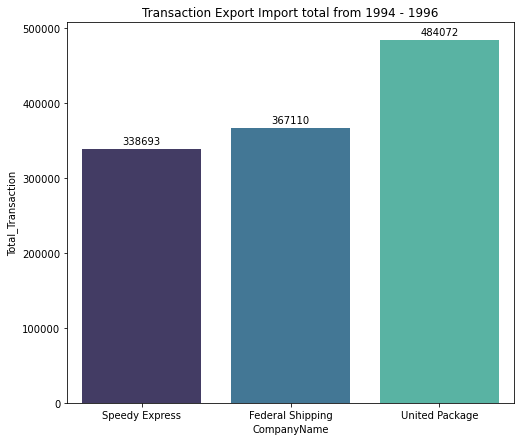

In [672]:
plt.figure(figsize=(8,7))
splot = sns.barplot(x='CompanyName', y='Total_Transaction', data=df_company, palette='mako')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.title("Transaction Export Import total from 1994 - 1996")
plt.savefig("Transaction.png")

* Dari ketiga perusahaan ekspor import, perusahaan United Package memiliki transaksi terbanyak selama 2 tahun dimana nilai transaksi barang mencapai 484072

### 2. Perkembangan Total transaksi barang bulan januari - desember ditahun 1995 

In [673]:
df_transaction = pd.crosstab(index=[tabel1['YearOrder'], tabel1['MonthOrder']], columns='Total_Transaction', values=tabel1['Total_Price'], aggfunc='sum').reset_index()

In [674]:
### jika dalam transaksi tidak 1 tahun gunakan mean
### jika ada transaksi dalam 1 tahun gunakan sum

In [675]:
df_transaction1 = df_transaction.iloc[[9,8,12,5,13,11,10,6,16,15,14,7]]
df_transaction1

col_0,YearOrder,MonthOrder,Total_Transaction
9,1995,January,42559.4100
8,1995,February,52540.2450
12,1995,March,45760.0850
5,1995,April,35124.5150
13,1995,May,52026.1075
11,1995,June,53781.2900
10,1995,July,33843.8025
6,1995,August,51020.8575
16,1995,September,45841.6700
15,1995,October,50105.7425


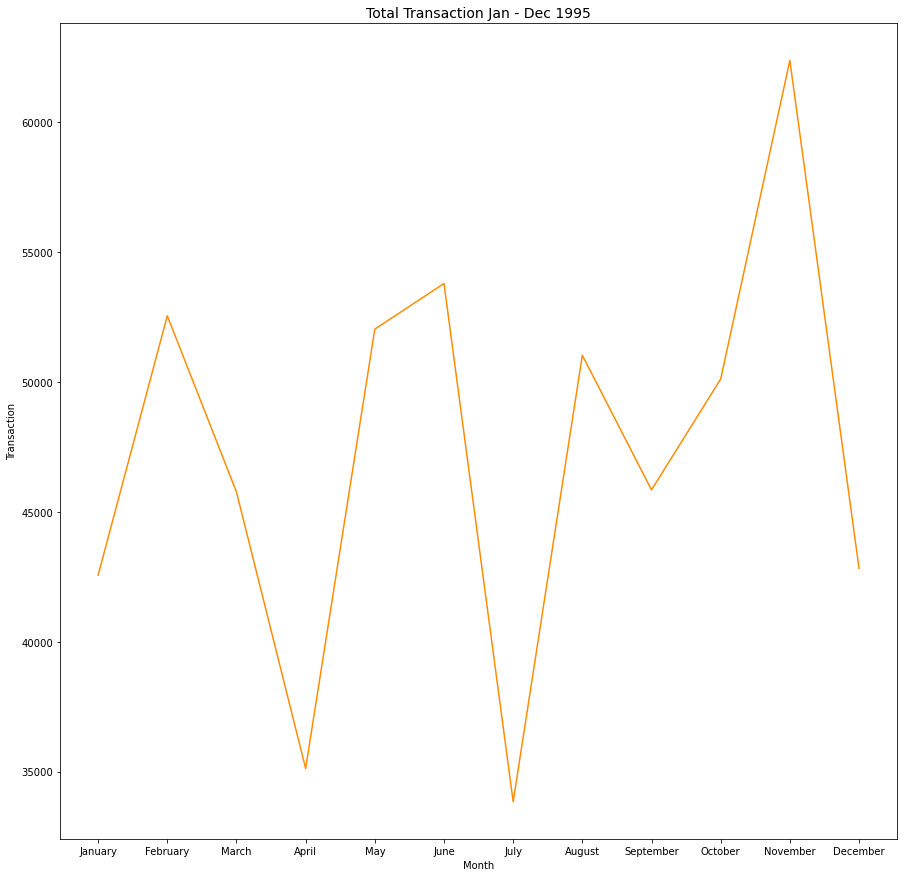

In [676]:
plt.figure(figsize=(15,15))
plt.plot(df_transaction1['MonthOrder'], df_transaction1['Total_Transaction'], color='darkorange')
plt.xlabel("Month")
plt.ylabel("Transaction")
plt.title("Total Transaction Jan - Dec 1995", fontsize=14)
plt.savefig("Transaction_in_1995.png")

### 3. Negara yang memiliki jumlah total transaksi kargo  

* Mementukan negara manakah yang memiliki transaksi cargo terbanyak dimana semakin tinggi transaksi cargo mengindikasikan kuat lemahnya perdagangan tiap negara

In [677]:
df_cargo = pd.crosstab(index=tabel1['ShipCountry'], columns='Cargo_Transaction', values=tabel1['Freight'], aggfunc='sum').reset_index().sort_values('Cargo_Transaction', ascending=False)

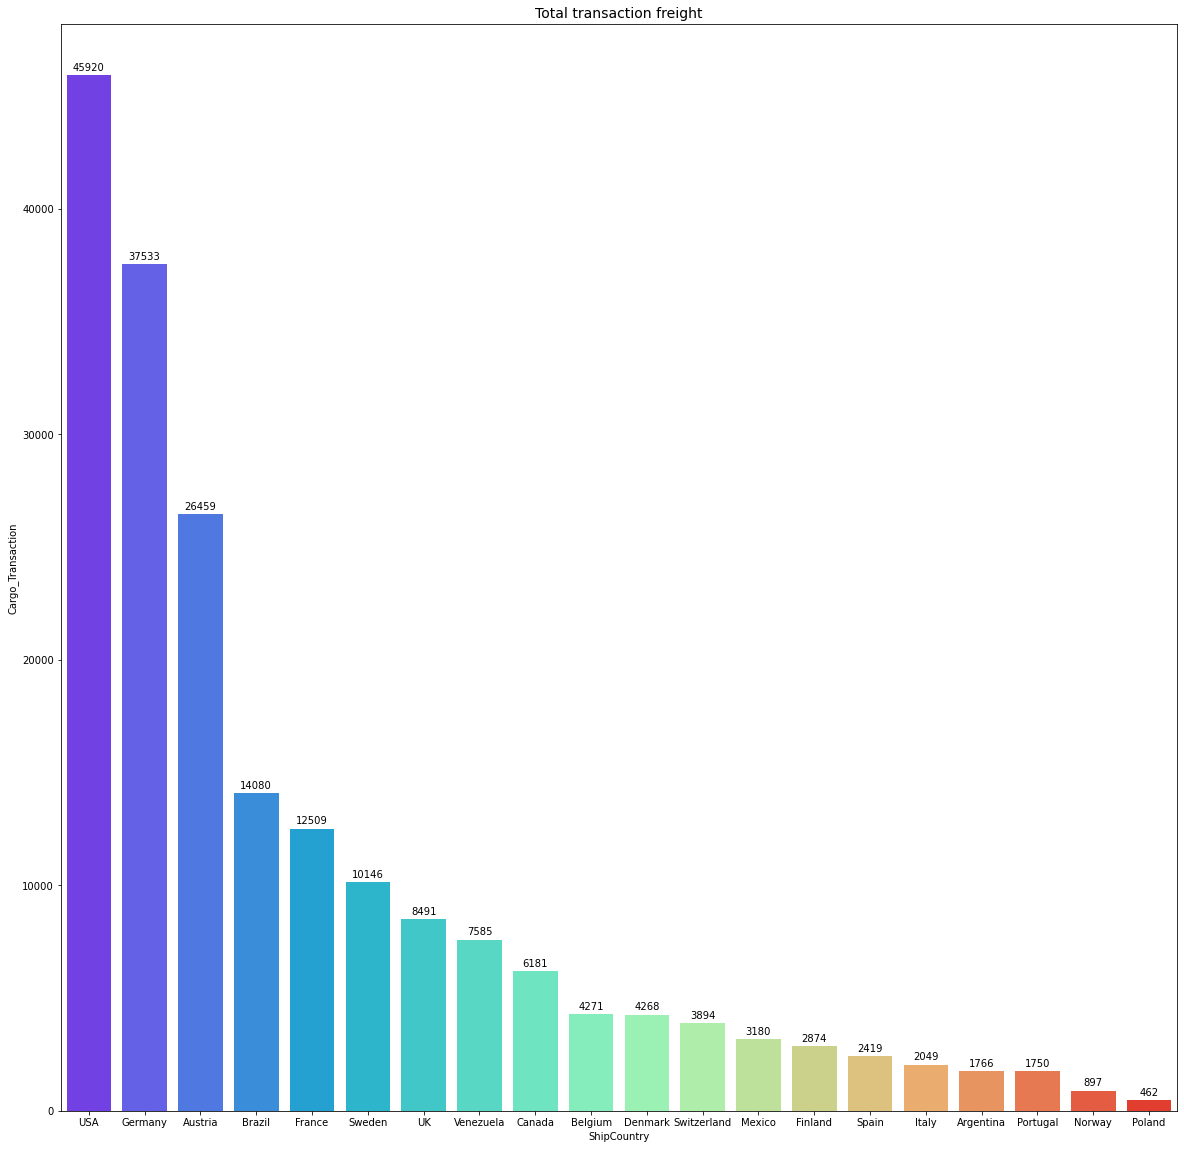

In [678]:
plt.figure(figsize=(20,20))
splot = sns.barplot(x='ShipCountry', y='Cargo_Transaction', data=df_cargo, palette='rainbow')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 8), 
                   textcoords = 'offset points')
plt.title("Total transaction freight", fontsize=14)
plt.savefig("Freight.png")

* Berdasarkan transaksi kargo, negara USA merupakan transaksi kargo tertinggi 

### Uji Hipotesa

In [679]:
tabel1['Total_Price'].mean()

587.0131741489887

In [680]:
## Hypothesis 
## H0: Rata-rata total price = 600 
## Ha: Rata-rata total price < 600 

In [681]:
from scipy.stats import ttest_1samp

In [682]:
tval, pval = ttest_1samp(tabel1['Total_Price'], 600)

if pval/2 < 0.05:
    print("Reject H0")
    print("Data Tidak Distribusi Normal")
else:
    print("Accept H0")
    print("Data Distribusi Normal")

Accept H0
Data Distribusi Normal


* Data terima H0, dan berdistribusi normal
* Tujuan dari hypothesis ini mengetahui distribusi normal didata

In [683]:
## Hypothesis
## H0: unit_price produk == Total_price produk
## Ha: unit_price produk != Total_price produk

In [684]:
from scipy.stats import ttest_ind

In [685]:
tval, pval = ttest_ind(
tabel1[tabel1['UnitPrice'] == 'Yes']['Total_Price'], 
tabel1[tabel1['UnitPrice'] == 'No']['Total_Price'], 
equal_var = False)

if pval < 0.05:
    print("Tolak Ho")
else:
    print("Terima Ho")

Terima Ho


* Kita Punya Bukti Menerima H0
* Tujuan hipotesis ini adalah mengetahui hubungan antara unitprice terhadap total_produk

### Uji Korelasi

In [686]:
tabel1.corr()

,OrderID,EmployeeID,ProductID,Freight,UnitPrice,Quantity,Discount,YearOrder,YearShipped,Total_Price
OrderID,1.000000,0.001734,-0.041666,0.059992,0.071926,0.006752,0.001055,0.908099,0.903674,0.048745
EmployeeID,0.001734,1.000000,-0.023901,0.000790,-0.008162,-0.004630,0.048863,0.000435,-0.003648,-0.013910
ProductID,-0.041666,-0.023901,1.000000,-0.003995,-0.017657,0.004256,-0.033999,-0.037869,-0.026417,-0.000746
Freight,0.059992,0.000790,-0.003995,1.000000,0.232572,0.367133,0.015601,0.060680,0.054520,0.393424
UnitPrice,0.071926,-0.008162,-0.017657,0.232572,1.000000,-0.001356,-0.015637,0.071828,0.076621,0.709245
Quantity,0.006752,-0.004630,0.004256,0.367133,-0.001356,1.000000,0.126784,0.016087,0.009499,0.466100
Discount,0.001055,0.048863,-0.033999,0.015601,-0.015637,0.126784,1.000000,0.030275,0.025489,0.001793
YearOrder,0.908099,0.000435,-0.037869,0.060680,0.071828,0.016087,0.030275,1.000000,0.973045,0.051230
YearShipped,0.903674,-0.003648,-0.026417,0.054520,0.076621,0.009499,0.025489,0.973045,1.000000,0.049826
Total_Price,0.048745,-0.013910,-0.000746,0.393424,0.709245,0.466100,0.001793,0.051230,0.049826,1.000000


Text(0.5, 1.0, 'Corelation between Freight and Total Price')

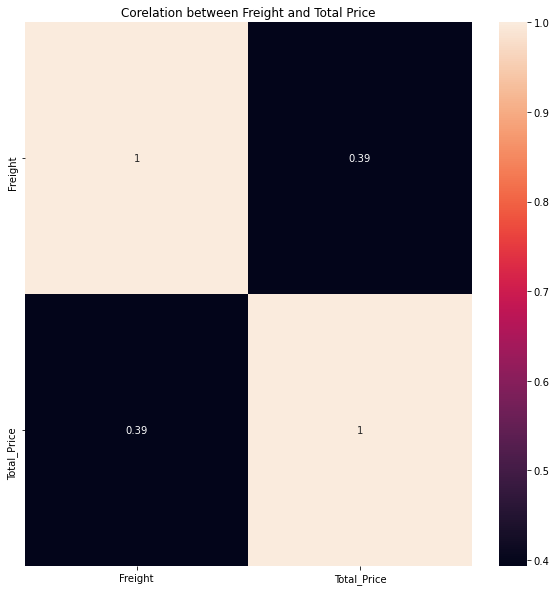

In [687]:
plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['Freight','Total_Price']].corr(), annot=True)
plt.title("Corelation between Freight and Total Price")

* Hubungan antara Freight terhadap total_price berkolerasi kuat lemah sehingga kedua variabel kurang memiliki pengaruh yang kuat
* Dalam insight bisnis, pengaruh harga kargo terhadap total barang yang diangkut kurang kuat sehingga sedikit dampak dari transaksi tersebut 